In [ ]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Figure saved to C:\Users\manue\Desktop\crude_oil_timeline_events.png


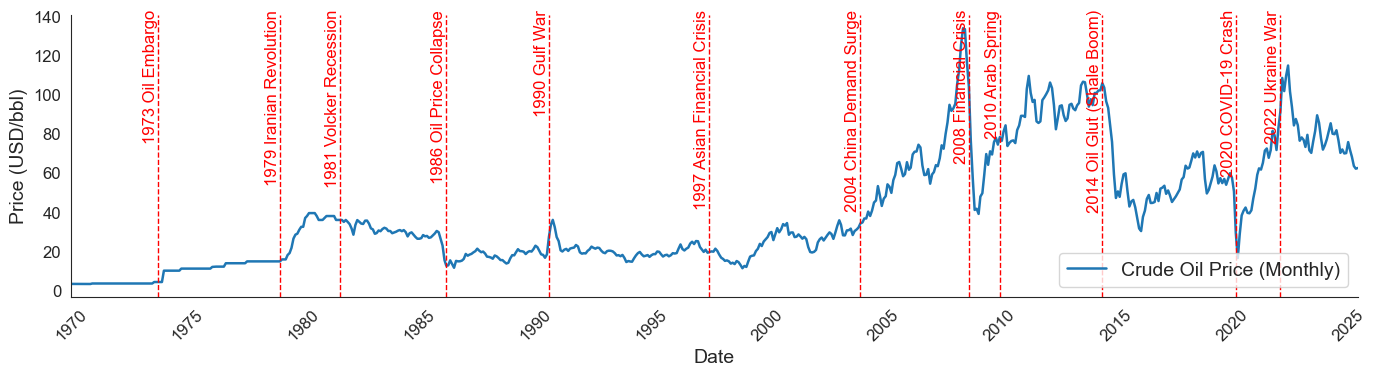

In [1]:
# ----------------------------------------------------------------------------
# Crude-oil timeline with vertical event labels — legend bottom-left
# ----------------------------------------------------------------------------

# Load
csv_path = r"C:\Users\manue\Desktop\chart_20250702T171747.csv"
df = (
    pd.read_csv(csv_path, parse_dates=["Date"])
      .rename(columns={"Value": "Price"})
      .sort_values("Date")
      .set_index("Date")
)

# Style
mpl.rcParams.update({
    "font.family":  "serif",
    "font.serif":   ["Times New Roman"],
    "font.size":    14,
    "figure.facecolor": "white",
    "axes.facecolor":   "white",
    "savefig.facecolor": "white",
    "axes.grid":    False,
})
sns.set_style("white")

# Events
events = [
    ("1973-10-01", "1973 Oil Embargo"),
    ("1979-01-01", "1979 Iranian Revolution"),
    ("1981-08-01", "1981 Volcker Recession"),
    ("1986-03-01", "1986 Oil Price Collapse"),
    ("1990-08-01", "1990 Gulf War"),
    ("1997-07-01", "1997 Asian Financial Crisis"),
    ("2004-01-01", "2004 China Demand Surge"),
    ("2008-09-01", "2008 Financial Crisis"),
    ("2010-01-01", "2010 Arab Spring"),
    ("2014-06-01", "2014 Oil Glut (Shale Boom)"),
    ("2020-03-01", "2020 COVID-19 Crash"),
    ("2022-02-01", "2022 Ukraine War"),
]

# Plot
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(df.index, df["Price"], label="Crude Oil Price (Monthly)", lw=1.8)

for date_str, label in events:
    dt = pd.to_datetime(date_str)
    ax.axvline(dt, color="red", linestyle="--", lw=1)
    ax.text(
        dt,
        ax.get_ylim()[1] + 3,
        label,
        rotation=90,
        rotation_mode="anchor",
        color="red",
        fontsize=12,
        ha="right",
        va="bottom",
    )

# Axis
ax.set_ylabel("Price (USD/bbl)")
ax.set_xlabel("Date")

ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(axis="x", labelrotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xlim(df.index.min(), df.index.max())

ax.legend(loc="lower right", frameon=True) # legend bottom-left

sns.despine(ax=ax)
plt.tight_layout()

# Save
out_path = os.path.join(os.path.expanduser("~"),
                        "Desktop", "crude_oil_timeline_events.png")
plt.savefig(out_path, dpi=300)
print(f"Figure saved to {out_path}")

plt.show()
